# KMeans Clustering Customer Segmentation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

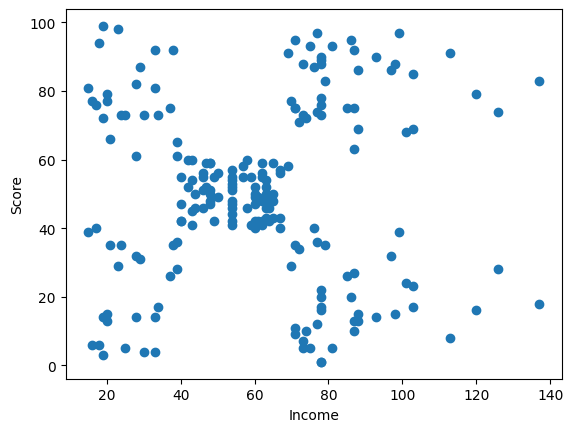

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [5]:
x = df.iloc[:,[3,4]].values

In [6]:
k = 5
from sklearn.cluster import KMeans

model = KMeans(n_clusters=k,random_state=0)
model.fit(x)
y=model.predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

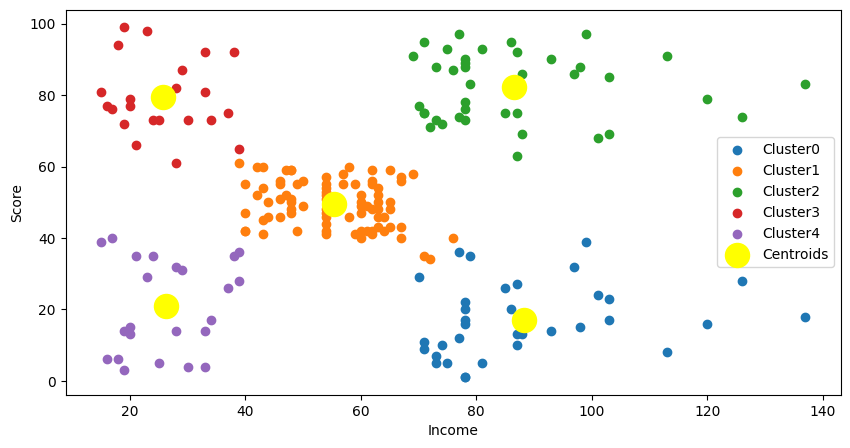

In [7]:
plt.figure(figsize=(10,5))
for i in range(k):
    plt.scatter(x[y==i,0],x[y==i,1],label=f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,
               c='yellow', label='Centroids')
plt.legend()
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

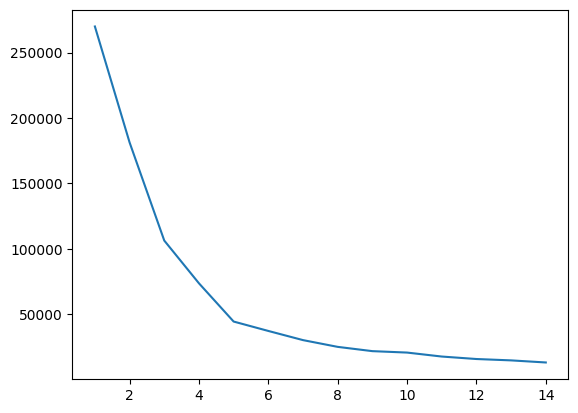

In [8]:
# Elbow Method to find value of K
k = range(1,15)
sse = []
for i in k:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(x)
    sse.append(model_demo.inertia_)
plt.plot(k,sse)
plt.show()

In [9]:
# Silhouette Score

from sklearn.metrics import silhouette_score

In [10]:
silhouette_score(x,y)

0.553931997444648

2 Cluster, Score = 0.2968969162503008
3 Cluster, Score = 0.46761358158775435
4 Cluster, Score = 0.4931963109249047
5 Cluster, Score = 0.553931997444648
6 Cluster, Score = 0.5379675585622219
7 Cluster, Score = 0.5264283703685728
8 Cluster, Score = 0.45704384633565154
9 Cluster, Score = 0.4563032021725485
10 Cluster, Score = 0.4492169169017592
11 Cluster, Score = 0.437104484577306
12 Cluster, Score = 0.42507724579994494
13 Cluster, Score = 0.4361876168478583
14 Cluster, Score = 0.40466460708668867


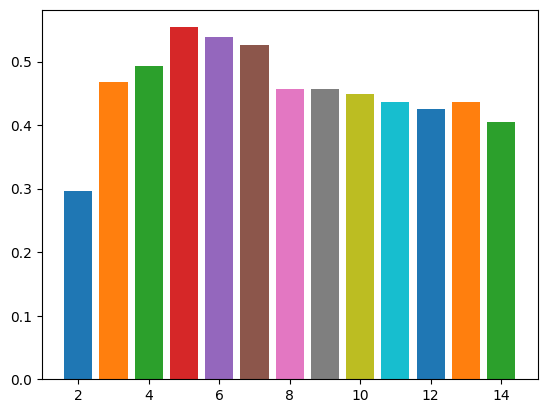

In [11]:
# Check Score from k=2 to k=8
k = range(2,15)
for i in k:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(x)
    y=model_demo.predict(x)
    print(f"{i} Cluster, Score = {silhouette_score(x,y)}")
    plt.bar(i,silhouette_score(x,y))
plt.show()    